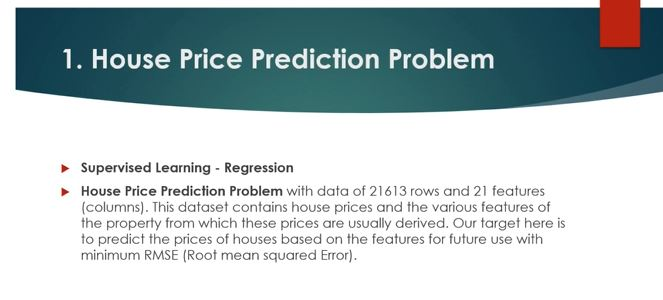

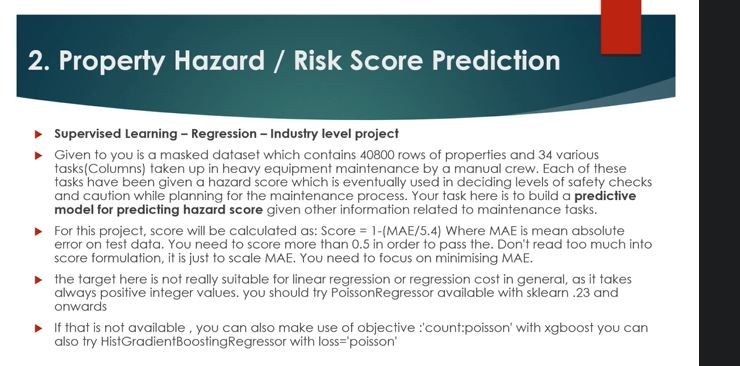

This dataset is absed on particular problem which is property hazards problem
So there are different  property in the location and one particular organization is trying to do maintance of these maintance of these properties and they are trying to restore the properties

when the organization takes up the task of restoring thise property , so there are certain hazards which are associated with the properties which is being restored  
There could be the case where the property has zero risk and it is fine to retore it 
while there could be property where it would be very difficult to restore The property and there could be different hazards which could be possible and may be company might loose a lot of money by investing in that property , and still it will not be good enough for selling to someone else .
So this is different risk level which are associated with these properties 
so here 40800 properties and 34 different risk factor associated with different task with which we are creating a generalize single risk score 

So this risk score is actually dependent on these 34 difefrent task

these task are for taking up in different heavy equipments maintenance by a manual crew .
Each of these task have been given a hazard score which is eventually used in deciding levels of safety checks and caution while planning for the maintenance process.

Our task is here to build a predictive model for predicting hazard score given other information related to maintenance task 

now one thing to note is risc score is not continuous values 
But these are actual numbers and there are lot of numbers , So it's not fit to be a classification problem that is why we will be using a regression it 

Sow e can use objective function  'Count:pison '

So count poison is actually will be helpful in finding out in applying regression but for the whole numbers 

In [1]:
# Import libraries

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [4]:
# Loading deta

df = pd.read_csv('Hazard_train.csv')

In [5]:
df.head()

Id  Hazard  T1_V1  T1_V2  T1_V3 T1_V4 T1_V5 T1_V6 T1_V7 T1_V8  ...  \
0  83642       2     10     23      4     N     K     Y     B     D  ...   
1  92530       6      3     18      2     B     H     N     B     B  ...   
2  86131       4      5     20      4     B     K     N     B     B  ...   
3  88666       1      4      7      5     N     H     N     B     B  ...   
4  11122      21     10     21      6     N     C     Y     B     C  ...   

  T2_V6  T2_V7 T2_V8 T2_V9  T2_V10  T2_V11 T2_V12 T2_V13 T2_V14  T2_V15  
0     2     37     1    11       2       Y      N      E      2       1  
1     2     34     1    12       7       Y      N      C      3       3  
2     1     40     1    17       4       Y      N      D      1       1  
3     2     37     1    11       6       Y      N      D      2       1  
4     2     40     1     6       6       N      N      D      5       5  

[5 rows x 34 columns]

The given daatset contain id's, hazards details 

which is the numeric value , integer value which is whole number it is not a floating point number 

Then we have different variables 

In [6]:
df.shape

(40799, 34)

In [7]:
cols = df.columns

In [8]:
cols

Index(['Id', 'Hazard', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6',
       'T1_V7', 'T1_V8', 'T1_V9', 'T1_V10', 'T1_V11', 'T1_V12', 'T1_V13',
       'T1_V14', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V1', 'T2_V2', 'T2_V3',
       'T2_V4', 'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V11', 'T2_V12', 'T2_V13', 'T2_V14', 'T2_V15'],
      dtype='object')

In [9]:
predictors = df[cols[2:]]
target = df['Hazard']

In [10]:
predictors

T1_V1  T1_V2  T1_V3 T1_V4 T1_V5 T1_V6 T1_V7 T1_V8 T1_V9  T1_V10  ...  \
0         10     23      4     N     K     Y     B     D     E       2  ...   
1          3     18      2     B     H     N     B     B     D       8  ...   
2          5     20      4     B     K     N     B     B     E       7  ...   
3          4      7      5     N     H     N     B     B     B       8  ...   
4         10     21      6     N     C     Y     B     C     D      12  ...   
...      ...    ...    ...   ...   ...   ...   ...   ...   ...     ...  ...   
40794     10      4      3     N     C     N     D     B     D      12  ...   
40795      6      7      1     B     A     Y     B     B     D       3  ...   
40796      5      7      5     C     A     N     B     B     D       2  ...   
40797      1      9      2     C     K     N     B     B     E       7  ...   
40798      2      9      6     C     K     N     B     B     E       3  ...   

      T2_V6 T2_V7  T2_V8  T2_V9 T2_V10 T2_V11 T2_V12  T2_V13  T2_V14 T2_V15  
0         2    37      1     11      2      Y      N       E       2      1  
1         2    34      1     12      7      Y      N       C       3      3  
2         1    40      1     17      4      Y      N       D       1      1  
3         2    37      1     11      6      Y      N       D       2      1  
4         2    40      1      6      6      N      N       D       5      5  
...     ...   ...    ...    ...    ...    ...    ...     ...     ...    ...  
40794     2    34      1     16      5      Y      N       C       4      2  
40795     2    22      1      1      6      Y      N       E       4      1  
40796     1    37      1      3      4      Y      Y       E       1      5  
40797     3    22      1     21      4      Y      N       D       1      1  
40798     2    22      1     12      6      Y      Y       E       2      1  

[40799 rows x 32 columns]

In [11]:
target

0         2
1         6
2         4
3         1
4        21
         ..
40794     1
40795     4
40796     4
40797     1
40798     1
Name: Hazard, Length: 40799, dtype: int64

In [12]:
df.describe()

Id        Hazard         T1_V1         T1_V2         T1_V3  \
count   40799.000000  40799.000000  40799.000000  40799.000000  40799.000000   
mean    50850.454276      4.009584      9.723645     12.849359      3.190691   
std     29282.641037      4.007785      5.170715      6.257502      1.742044   
min         2.000000      1.000000      1.000000      1.000000      1.000000   
25%     25596.500000      1.000000      6.000000      7.000000      2.000000   
50%     50784.000000      3.000000      9.000000     14.000000      3.000000   
75%     76198.500000      5.000000     14.000000     18.000000      4.000000   
max    101999.000000     69.000000     19.000000     24.000000      9.000000   

             T1_V10        T1_V13        T1_V14         T2_V1         T2_V2  \
count  40799.000000  40799.000000  40799.000000  40799.000000  40799.000000   
mean       7.025123     14.009902      1.582416     57.568641     12.410451   
std        3.596619      4.649012      0.865121     23.461468      4.785406   
min        2.000000      5.000000      0.000000      1.000000      1.000000   
25%        3.000000     10.000000      1.000000     40.000000      9.000000   
50%        8.000000     15.000000      1.000000     55.000000     11.000000   
75%       12.000000     20.000000      2.000000     77.000000     15.000000   
max       12.000000     20.000000      4.000000    100.000000     39.000000   

              T2_V4         T2_V6         T2_V7         T2_V8         T2_V9  \
count  40799.000000  40799.000000  40799.000000  40799.000000  40799.000000   
mean      10.251403      1.947499     33.504620      1.031349     12.496973   
std        4.845443      0.795249      5.830512      0.191676      7.313552   
min        1.000000      1.000000     22.000000      1.000000      1.000000   
25%        6.000000      2.000000     31.000000      1.000000      6.000000   
50%       10.000000      2.000000     34.000000      1.000000     14.000000   
75%       14.000000      2.000000     40.000000      1.000000     18.000000   
max       22.000000      7.000000     40.000000      3.000000     25.000000   

             T2_V10        T2_V14        T2_V15  
count  40799.000000  40799.000000  40799.000000  
mean       4.489963      2.448344      3.482512  
std        1.899386      1.257293      3.070911  
min        1.000000      1.000000      1.000000  
25%        3.000000      2.000000      1.000000  
50%        4.000000      2.000000      2.000000  
75%        6.000000      3.000000      5.000000  
max        7.000000      7.000000     12.000000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40799 entries, 0 to 40798
Data columns (total 34 columns):
Id        40799 non-null int64
Hazard    40799 non-null int64
T1_V1     40799 non-null int64
T1_V2     40799 non-null int64
T1_V3     40799 non-null int64
T1_V4     40799 non-null object
T1_V5     40799 non-null object
T1_V6     40799 non-null object
T1_V7     40799 non-null object
T1_V8     40799 non-null object
T1_V9     40799 non-null object
T1_V10    40799 non-null int64
T1_V11    40799 non-null object
T1_V12    40799 non-null object
T1_V13    40799 non-null int64
T1_V14    40799 non-null int64
T1_V15    40799 non-null object
T1_V16    40799 non-null object
T1_V17    40799 non-null object
T2_V1     40799 non-null int64
T2_V2     40799 non-null int64
T2_V3     40799 non-null object
T2_V4     40799 non-null int64
T2_V5     40799 non-null object
T2_V6     40799 non-null int64
T2_V7     40799 non-null int64
T2_V8     40799 non-null int64
T2_V9     40799 non-null int64
T2_V10    

In [14]:
df.select_dtypes(['object']).columns

Index(['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11',
       'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11',
       'T2_V12', 'T2_V13'],
      dtype='object')

In [15]:
objcol = df.select_dtypes(['object']).columns

In [16]:
objcol

Index(['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11',
       'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11',
       'T2_V12', 'T2_V13'],
      dtype='object')

SO below we will find the cutoff value , So here we will set the cutoff value to 0.05 , so whatever value is having 5% less than 5% freq of any information we simply get rid of those categories and convert my categorical column into dummy varaibles 

In [18]:
cutoff = df.shape[0] * 0.05
print("cutoff : ", cutoff)

cutoff :  2039.95


In [19]:
for col in objcol:
    freqs=df[col].value_counts()
    selected_cats=freqs.index[freqs > cutoff]
    
    print(col)
    for cat in selected_cats:
        name=col+'_'+cat
        
        df[name]=(df[col]==cat).astype(int)
    del df[col]

T1_V4
T1_V5
T1_V6
T1_V7
T1_V8
T1_V9
T1_V11
T1_V12
T1_V15
T1_V16
T1_V17
T2_V3
T2_V5
T2_V11
T2_V12
T2_V13


In [20]:
df.head()

Id  Hazard  T1_V1  T1_V2  T1_V3  T1_V10  T1_V13  T1_V14  T2_V1  T2_V2  \
0  83642       2     10     23      4       2      10       0     52     14   
1  92530       6      3     18      2       8      10       3     39     14   
2  86131       4      5     20      4       7      15       1     66     10   
3  88666       1      4      7      5       8      15       3     48     11   
4  11122      21     10     21      6      12      10       1     42     11   

   ...  T2_V5_B  T2_V5_C  T2_V11_Y  T2_V11_N  T2_V12_N  T2_V12_Y  T2_V13_E  \
0  ...        0        1         1         0         1         0         1   
1  ...        0        0         1         0         1         0         0   
2  ...        0        1         1         0         1         0         0   
3  ...        1        0         1         0         1         0         0   
4  ...        0        0         0         1         1         0         0   

   T2_V13_A  T2_V13_C  T2_V13_D  
0         0         0         0  
1         0         1         0  
2         0         0         1  
3         0         0         1  
4         0         0         1  

[5 rows x 63 columns]

In [21]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [22]:
X = df[df.columns[2:]]# Feature and attributes 
Y=pd.DataFrame()
Y['Hazard'] = df['Hazard'] # Target

In [23]:
Y.columns

Index(['Hazard'], dtype='object')

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split

In [25]:
import numpy as np
lambdas=np.linspace(1,100,100)
lm=Ridge(fit_intercept=True)
params= {
    'alpha':lambdas
}
ridgesearch=GridSearchCV(lm , param_grid=params , cv=10 ,n_jobs=-1,  scoring='neg_mean_absolute_error' ,  verbose=30)
ridgesearch.fit(X,Y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   28.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   40.3s
[Paralle

[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:   53.6s
[Paralle

[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:  1.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:  1.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  1.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:  1.6min
[Paralle

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.

In [26]:
ridgesearch.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
report(ridgesearch.cv_results_,5)

Model with rank: 1
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 100.0}

Model with rank: 2
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 99.0}

Model with rank: 3
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 98.0}

Model with rank: 4
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 97.0}

Model with rank: 5
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 96.0}



These re results which are not satisfacory 

In [28]:
X.shape

(40799, 61)

In [29]:
Y.shape

(40799, 1)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
def predplotter(searchobj):
  cur_model = searchobj#.best_estimator_
  cur_model.fit(x_train, y_train)
  preds = cur_model.predict(x_test)
  plt.figure(figsize=(12, 6))
  plt.plot(x_test['T2_V1'], y_test, 'o')           # scatter plot showing actual data
  plt.plot(x_test['T2_V1'],preds , 'r', linewidth=2)   # regression line
  plt.xlabel('T2V1')
  plt.ylabel('predictions')
  plt.title('T2v1 vs predictions')
  plt.show()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:    9.6s
[Paralle

[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:   18.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:   26.3s
[Paralle

[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 551 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   36.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 683 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 684 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 685 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 687 tasks      | elapsed:   45.5s
[Paralle

[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 819 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:   54.0s
[Paralle

[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 949 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 950 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 951 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 953 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 954 tasks      | elapsed:  1.0min
[Paralle

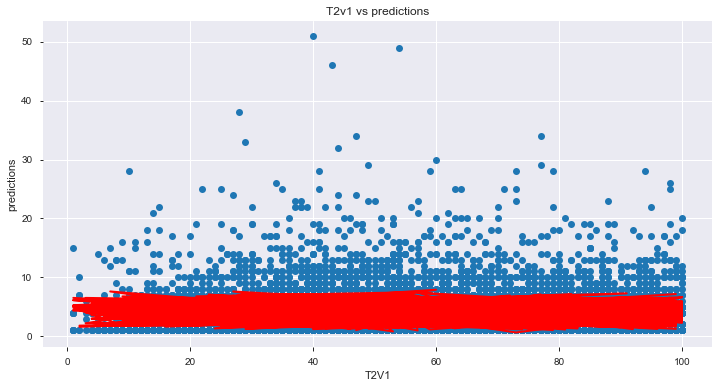

In [31]:
predplotter(ridgesearch)

Sow e can see that T2V1 is scatter like this

and red one is predictor 

so we can see that it is not able to find out these value which are scattered around 

In [32]:
dtreg = DecisionTreeRegressor(criterion='mae')

params ={'max_depth':[None,5,7,10,12,15],
            'min_samples_leaf':[5,10,30,50,100], 
            'min_samples_split':[2,5,10,15,20,50,70,100]}

dtree = RandomizedSearchCV(param_distributions = params, estimator = dtreg, cv =5,n_iter=10, verbose = 30,n_jobs=-1, scoring='neg_mean_absolute_error')

In [33]:
dtree.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 19

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mae',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_dist

As we can see it has took 68 min to run only above  code hence this the reason why we should use google collab 

In [34]:
dtree.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [35]:
report(dtree.cv_results_,5)

Model with rank: 1
Mean validation score: -2.645 (std: 0.02930)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 30, 'max_depth': 7}

Model with rank: 2
Mean validation score: -2.646 (std: 0.03549)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 5}

Model with rank: 3
Mean validation score: -2.646 (std: 0.03334)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 100, 'max_depth': 5}

Model with rank: 4
Mean validation score: -2.653 (std: 0.03144)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 100, 'max_depth': 10}

Model with rank: 5
Mean validation score: -2.654 (std: 0.03176)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 50, 'max_depth': 10}



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 15

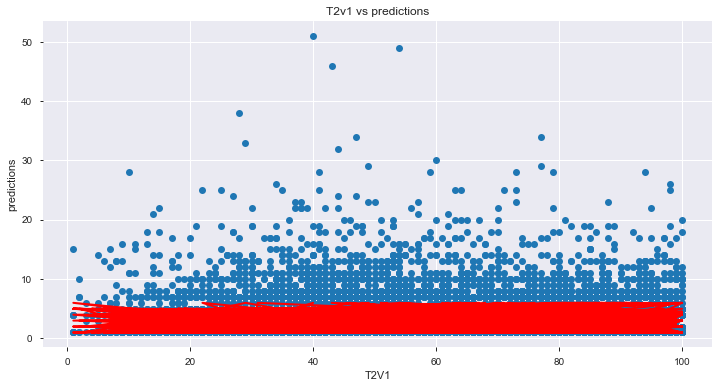

In [36]:
predplotter(dtree)

Now we can se that it is littile beeter as compared to previous one 

next we will implement the radom forest regressor 

In [37]:
help(RandomForestRegressor)

<IPython.core.display.Javascript object>

Help on LazyImport in module pyforest._importable object:

RandomForestRegressor = class LazyImport(builtins.object)
 |  RandomForestRegressor(import_statement)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, attribute)
 |      # called for undefined attribute and returns the attribute of the imported module
 |  
 |  __init__(self, import_statement)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __maybe_add_docstring_and_signature__(self)
 |  
 |  __maybe_import__(self)
 |      # Python will only import the module(s) if they are missing
 |      # if the module(s) were imported before, this method returns immediately
 |  
 |  __maybe_import_complementary_imports__(self)
 |  
 |  __on_import__(self, lazy_import)
 |  
 |  __repr__(self, *args, **kwargs)
 |      Return repr(self).
 |  
 |  -------------------------

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(criterion='mae',  verbose=30, n_estimators=100, n_jobs=-1)

params ={"n_estimators":[500],
    'max_depth':[5,10,15],
            'min_samples_leaf':[5,10,30,50,100], 
            'min_samples_split':[2,5,10,15,20,50,70,100]
         }

rftree = RandomizedSearchCV(param_distributions = params, estimator = rfreg, cv =5,n_iter=1, verbose = 30, scoring='neg_mean_absolute_error')
rftree.fit(X,Y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  14 tasks

In [ ]:
dir(rfreg)
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

param_tuning = {
        #'learning_rate': [0.01, 0.05,0.1,0.25, 0.5, 0.7],
        #'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 250, 500,750,1000],
        'objective': ['count:poisson']}

xgbsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch.fit(X,Y)
print(xgbsearch.best_params_)
print(report(xgbsearch.cv_results_,5))
predplotter(xgbsearch)

In [ ]:
param_tuning = {
        'learning_rate': [0.01, 0.05,0.1,0.25, 0.5, 0.7],
        #'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 250],
        'objective': ['count:poisson']}

xgbsearch2 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch2.fit(X,Y)
print(xgbsearch2.best_params_)
print(report(xgbsearch2.cv_results_,5))
predplotter(xgbsearch2)

In [ ]:
param_tuning = {
        'learning_rate': [0.001,0.002, 0.005,0.007,0.01,0.02],
        #'max_depth':  [3, 5, 7, 10,12,15],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 250,500],
        'objective': ['count:poisson']}

xgbsearch3 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch3.fit(X,Y)
print(xgbsearch3.best_params_)
print(report(xgbsearch3.cv_results_,5))
predplotter(xgbsearch3)

In [ ]:
param_tuning = {
        'learning_rate': [0.002, 0.005],
        'max_depth':  [3, 5, 7, 10,12,15],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

In [ ]:
param_tuning = {
        'learning_rate': [0.002],
        'max_depth':  [ 7],
        'min_child_weight': [ 5,10,15,50,100,150,200],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

In [ ]:

param_tuning = {
        'learning_rate': [0.002],
        'max_depth':  [ 7],
        'min_child_weight': [ 15,30,50],
        'subsample': [0.1,0.2,0.5, 0.7,0.9],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

In [ ]:


param_tuning = {
        'learning_rate': [0.002],
        'max_depth':  [ 7],
        'min_child_weight': [ 15],
        'subsample': [0.7],
        'colsample_bytree': [0.1,0.2,0.5, 0.7,0.9],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

In [ ]:
# here we are trying for different parameters 